<table>
    <tr>
        <td><img src="images\Macc.png" width="400"/></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Integrantes:</p></tp>
            <tp><p style="font-size:150%;text-align:center">David Santiago Alsina y Nicolas Velandia</p></tp>
            </tr></table>
        </td>
        <td>
            <h1 style="color:blue;text-align:left">Analisis númerico</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Taller 3</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

In [1]:
include("fourier.jl")
include("systems.jl")
include("legendre.jl")
include("regressions.jl")
include("factorization.jl")
include("interpolations.jl")
include("iterative_methods.jl")
include("iterative_refination.jl")

using Plots
using DataFrames

# 1A 
![Punto 1.A](./images/1a.png)

## 1A.1

In [2]:
A = Float64.([2 -6 -1; -3 -1 7; -8 1 -2])
b = vec(Float64.([-38 -34 -20]))

exact_solution = inv(A)*b
print("Exact solution: ", exact_solution)

Exact solution: [4.0, 8.0, -1.9999999999999996]

***Eliminación gaussiana***:

In [3]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 


[2.0 -6.0 -1.0; 0.0 -10.0 5.5; 0.0 0.0 -18.65]


Reduced vector: 
[-38.0, -91.0, 37.29999999999998]
Solution: 
[4.0; 8.0; -1.9999999999999993;;]


***Eliminación gaussiana con pivoteo parcial:***

In [4]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -5.75 -1.5; 0.0 0.0 8.108695652173914]
Reduced vector: 
[-20.0, -43.0, -16.217391304347828]
Solution: 
[4.0; 8.0; -2.0;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:*** 

In [5]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [6.0; 7.0; 8.0;;]
Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -5.75 -1.5; 0.0 0.0 8.108695652173914]
Reduced vector: 
[-20.0, -43.0, -16.217391304347828]
Solution: 
[4.0; 8.0; -2.0;;]


## 1A.2

In [2]:
A = Float64.([1 2 -1 ; 5 -2 0 ; 0 -3 7])
b = vec(Float64.([3 2 2]))

exact_solution = inv(A)*b
print("Exact solution: ", exact_solution)

Exact solution: [0.9855072463768118, 1.463768115942029, 0.9130434782608695]

***Eliminación gaussiana***:

In [3]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[1.0 2.0 -1.0; 0.0 -12.0 5.0; 0.0 0.0 5.75]


Reduced vector: 
[3.0, -13.0, 5.25]
Solution: 
[0.9855072463768114; 1.463768115942029; 0.9130434782608695;;]


***Eliminación gaussiana con pivoteo parcial:***

In [4]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[5.0 -2.0 0.0; 0.0 -3.0 7.0; 0.0 0.0 4.6]
Reduced vector: 
[2.0, 2.0, 4.2]
Solution: 
[0.9855072463768118; 1.4637681159420293; 0.9130434782608696;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:***

In [5]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [2.0; 5.0; 7.0;;]
Reduced matrix: 
[5.0 -2.0 0.0; 0.0 2.4 -1.0; 0.0 0.0 5.75]
Reduced vector: 
[2.0, 2.6, 5.25]
Solution: 
[0.9855072463768118; 1.463768115942029; 0.9130434782608695;;]


# 1B
![Punto 1.B](images/1b.png)

In [6]:
A = Float64.([3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10])
b = vec(Float64.([7.85 -19.3 71.4]))

3-element Vector{Float64}:
   7.85
 -19.3
  71.4

In [7]:
L, U = LU(A)
println("A: \n", L*U)
println("L: \n", L)
println("U: \n", U)

A: 
[3.0 -0.1 -0.2; 0.1 6.996666666666667 -0.30666666666666664; 0.3 -0.21000000000000002 9.98857142857143]
L: 
[1.0 0.0 0.0; 0.03333333333333333 1.0 0.0; 0.09999999999999999 -0.028571428571428574 1.0]
U: 
[3.0 -0.1 -0.2; 0.0 7.0 -0.3; 0.0 0.0 10.0]


In [8]:
# solution
L,U = LU(A)
y = solution(L,b)
x = solution(U,y)
println("Solution: \n", x)
println("Exact solution: \n", inv(A)*b)

Solution: 
[2.6166666666666667, -2.7945238095238096, 7.005609523809525]
Exact solution: 
[3.0, -2.4999999999999996, 7.000000000000001]


# 2A

![Punto 2A](./images/2a.png)

In [10]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans1 = jacobi(A, b, x, tol, norm= "norm_infinite")

3-element Vector{Float64}:
 319.49652777777777
 226.0926783264746
 320.5977794924554

In [11]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans2 = gauss_siedel(A, b, x, tol, norm= "norm_infinite")

3-element Vector{Float64}:
 320.051601852435
 227.0597562910462
 321.43884697506553

# 2B
![Punto 2B](./images/2b.png)

#### 2B.1

![Alt text](./images/2b1.png)

In [34]:
A = [2 -6 -1; -3 -1 7; -8 1 -2]
b = vec([-38 -34 -20])
x = vec([0 0 0])

tol         = 1e-6
norm_type   = "norm_infinite"

print("Exact solution: ", inv(A)*b)

Exact solution: [4.0, 8.0, -1.9999999999999996]

In [35]:
ans3 = jacobi(A, b, x, tol, norm = norm_type)

3-element Vector{Float64}:
 -53240.0
 -15793.75
  35524.375

In [36]:
ans4 = gauss_siedel(A, b, x, tol, norm = norm_type)

3-element Vector{Float64}:
 -1.065797993941284e33
 -3.55537270958518e33
  2.4855056209725463e33

#### 2B.2

![Alt text](./images/2b2.png)

In [79]:
A = Float64.([1 2 -1 ; 5 -2 0 ; 0 -3 7])
b = vec(Float64.([3 2 2]))
x = vec([0 0 0])

tol         = 1e-6
norm_type   = "norm_infinite"

print("Exact solution: ", inv(A)*b)

Exact solution: [0.9855072463768118, 1.463768115942029, 0.9130434782608695]

In [81]:
ans5 = jacobi(A, b, x, tol, norm = norm_type)

3-element Vector{Float64}:
 -10.142857142857142
  12.214285714285714
   3.071428571428571

In [80]:
ans6 = gauss_siedel(A, b, x, tol, norm = norm_type)

The method did not converge in the given range of max iterations

3-element Vector{Float64}:
 NaN
 NaN
 NaN

#### 2B.3
![Alt text](./images/2b3.png)

In [40]:
A = [3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10]
b = vec([7.85 -19.3 71.4])
x = vec([0 0 0])

tol         = 0.001
norm_type   = "norm_infinite"

println("exact solution: \n", inv(A)*b)

exact solution: 
[3.0, -2.4999999999999996, 7.000000000000001]


In [41]:
ans7 = jacobi(A, b, x, tol, norm = norm_type)

3-element Vector{Float64}:
  3.000806349206349
 -2.49973843537415
  7.000206666666667

In [42]:
ans8 = gauss_siedel(A, b, x, tol, norm = norm_type)

3-element Vector{Float64}:
  3.0000003524692724
 -2.5000000357546064
  6.99999998871083

# 2C
![Punto 2C](./images/2c.png)

In [50]:
A = Float64.([2 -6 -1; -3 -1 7; -8 1 -2])
b = vec(Float64.([-38 -34 -20]))
tol = 1e-6

println("Exact solution: \n", inv(A)*b)

Exact solution: 
[4.0, 8.0, -1.9999999999999996]


In [51]:
x = iterative_refination2(A, b, tol, norm = "norm_infinite", max_iters = 1_000)
println("Solution: \n", x)

Solution: 
[319.75, -4.75, -1271.375]


In [67]:
A = Float64.([1 2 -1 ; 5 -2 0 ; 0 -3 7])
b = vec(Float64.([3 2 2]))
tol = 1e-6

println("Exact solutinn: \n", inv(A)*b)

Exact solutinn: 
[0.9855072463768118, 1.463768115942029, 0.9130434782608695]


In [71]:
x = iterative_refination2(A, b, tol, norm = "norm_infinite", max_iters = 1000)
println("Solution: \n", x)

Solution: 
[-6.928571428571429, -18.321428571428573, -7.566326530612246]


In [72]:
A = [3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10]
b = vec([7.85 -19.3 71.4])
tol = 1e-6

println("Exact solutinn: \n", inv(A)*b)

Exact solutinn: 
[3.0, -2.4999999999999996, 7.000000000000001]


In [73]:
x = iterative_refination2(A, b, tol, norm = "norm_infinite", max_iters = 1000)
println("Solution: \n", x)

Solution: 
[3.0000003524692724, -2.500000035754606, 6.99999998871083]


### Conclusiones punto 1 y 2

- Los diferentes metodos funcionan mejor o peor dependiendo del problema
- El metodo que mejor funciono fue el de invertir la matriz y multiplicarla por el vector b
- Jacobi y Gauss sidel son los metodos que menos convergen y mas error arrojan
- La eliminacion gaussiana requiere que la diagonal no contenga 0's, razon por la cual debimos modificar el orden de la matriz

# 3A

![3a](./images/3a.png)

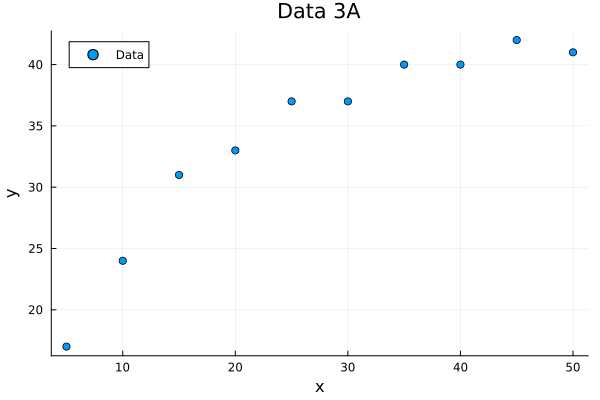

In [25]:
start = 5
end_ = 50
x = vec(range(start = start, stop = end_, step = 5))
y = vec([17 24 31 33 37 37 40 40 42 41])
points = [(x[i], y[i]) for i in 1:length(x)]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")

## 3A.1

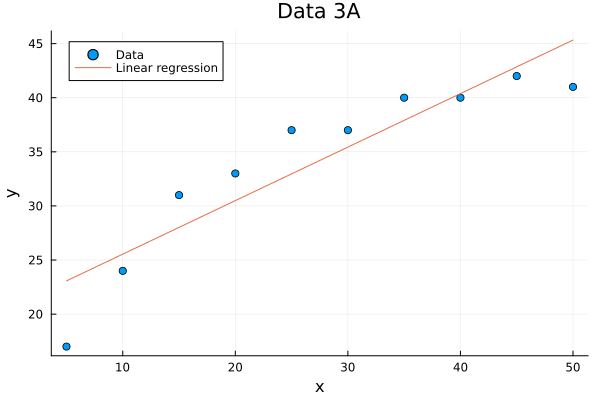

In [26]:
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(lin_fn, start, end_, label = "Linear regression")

## 3A.2

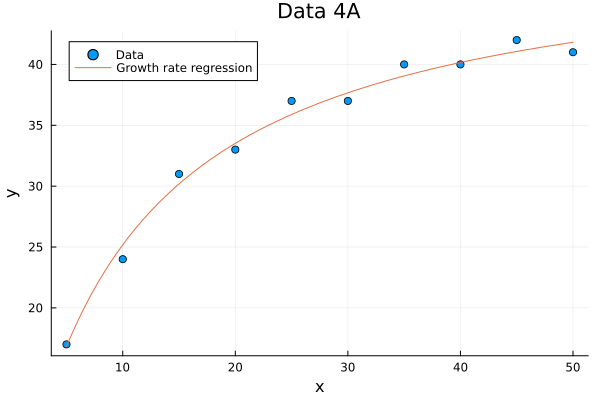

In [27]:
a0, a1 = growth_rate_regression(points)
growth_rate_fn = build_growth_rate_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 4A")
plot!(growth_rate_fn, start, end_, label = "Growth rate regression")

## 3A.3

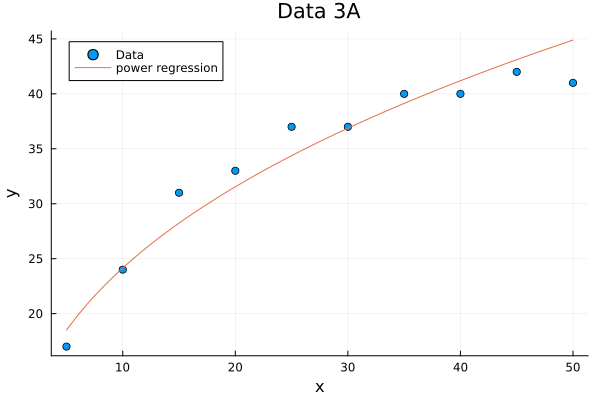

In [28]:
a0, a1 = power_regression(points)
pow_fn = build_pow_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(pow_fn, start, end_, label = "power regression")

## 3A.4

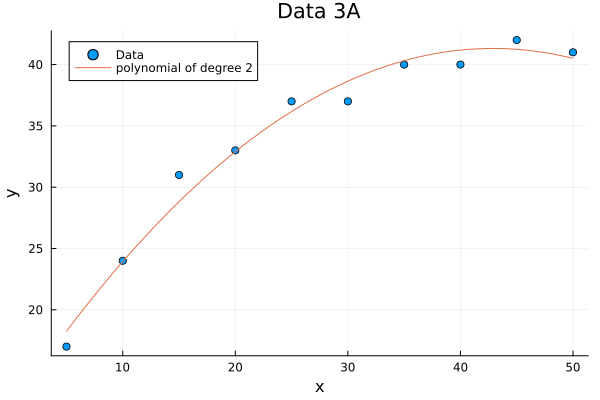

In [29]:
degree = 3
a = polynomial_regression(points, degree)
quad_fn = build_poly_fn(a)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(quad_fn, start, end_, label = "polynomial of degree $(degree-1)")


## 3A.5

In [30]:
generated_points = [y, lin_fn.(x), growth_rate_fn.(x),  pow_fn.(x), quad_fn.(x)]

df = DataFrame(generated_points, [:x, :linear, :growth_rate, :power, :polynomial])
df

Row,x,linear,growth_rate,power,polynomial
,Float64,Float64,Float64,Float64,Float64
1,17.0,23.0727,16.8192,18.4973,18.2545
2,24.0,25.5455,25.1828,24.1561,23.9394
3,31.0,28.0182,30.1864,28.2381,28.8212
4,33.0,30.4909,33.5161,31.5462,32.9
5,37.0,32.9636,35.8915,34.3768,36.1758
6,37.0,35.4364,37.6714,36.877,38.6485
7,40.0,37.9091,39.0548,39.1323,40.3182
8,40.0,40.3818,40.1609,41.1971,41.1848
9,42.0,42.8545,41.0656,43.1087,41.2485


## 3A.6

Para saber cuál es mejor usaremos el coeficiente de determinación generado por cada método

In [31]:
funcs = [lin_fn, growth_rate_fn, pow_fn, quad_fn]
det_coefs = [determination_coefficient(func, points) for func in funcs]

df = DataFrame(linear      = [det_coefs[1]],
               growth_rate = [det_coefs[2]],
               power       = [det_coefs[3]],
               polynomial  = [det_coefs[4]]) 

Row,linear,growth_rate,power,polynomial
,Float64,Float64,Float64,Float64
1,0.838491,0.98919,0.9377,0.979983


El ajuste superior para los datos fue el de un modelo de regresión por tasa de crecimiento, esto observando los niveles de error generados por cada modelo de regresion.

# 3B

![3b](./images/3b.png)

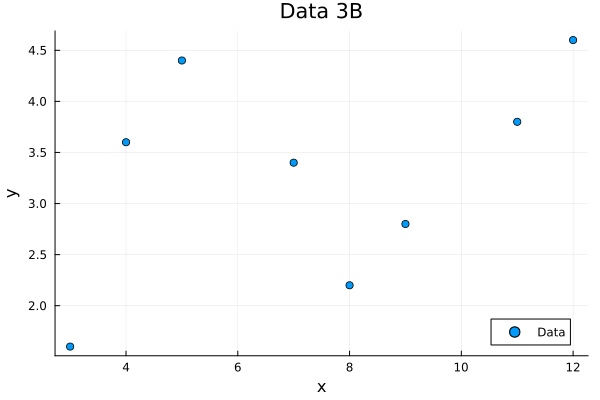

In [32]:
x = vec([3 4 5 7 8 9 11 12])
y = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])
points = [(x[i], y[i]) for i in 1:length(x)]

start = x[1]
end_ = x[end]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")

## 3B.1

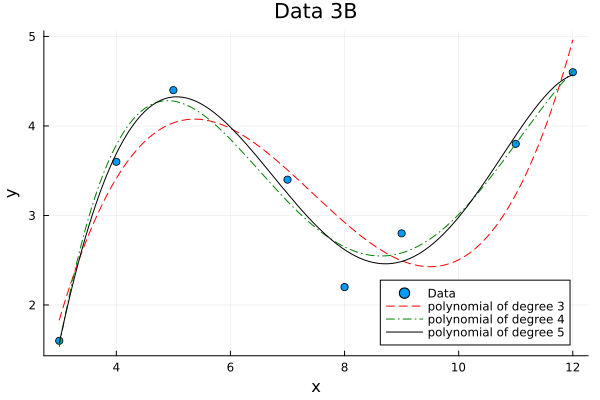

In [33]:
degree = 4

fn_degree3 = build_poly_fn(polynomial_regression(points, degree))
fn_degree4 = build_poly_fn(polynomial_regression(points, degree + 1))
fn_degree5 = build_poly_fn(polynomial_regression(points, degree + 2))

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")
plot!(fn_degree3, start, end_, label = "polynomial of degree $(degree-1)",  color = :red,   linestyle = :dash,)
plot!(fn_degree4, start, end_, label = "polynomial of degree $(degree)",    color = :green, linestyle = :dashdot,)
plot!(fn_degree5, start, end_, label = "polynomial of degree $(degree+1)",  color = :black)

## 3B.2

Para poder aplicar legendre es necesario que los datos esten en el intervalo [-1,1], por lo tanto se debe hacer un cambio de variable para que los datos esten en ese intervalo.

El cambio de variable es el siguiente:

$$
\begin{align*}
    x &= \frac{(b-a) \times (t+1)}{2} + a \\
    t &= 2\frac{(x-a)}{b-a} - 1
\end{align*}
$$

In [34]:
# x = ((b - a)*(t + 1)/2) + a
# t = -1 + (2*(x - a)/(b - a))
function change_of_variable(x, a, b)
    return -1 + (2*(x - a)/(b - a))
end
function change_of_variable_inv(t, a, b)
    return a + ((b - a)*(t + 1)/2)
end

change_of_variable_inv (generic function with 1 method)

Para esta aproximación primero se interpoló con splines cúbicos (para tener una función la cual aproximar), y luego se trató de aproximarla con polinomios de legendre.

Number of polynomials: 8
Coefficients: 8


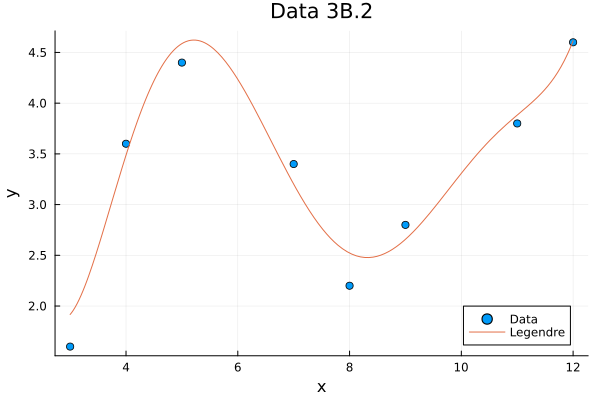

In [35]:
xdomain = vec([3 4 5 7 8 9 11 12])
y = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])
a = minimum(xdomain)
b = maximum(xdomain)
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

t = change_of_variable.(xdomain, a, b)
points = [(t[i], y[i]) for i in 1:length(xdomain)]

#interpolate points with cubic splines
@variables x
cubic_splines = build_cubic_splines(points, x)
fncubic       = (var) -> interpolate(cubic_splines, var)

#aproximate the interpolation with legendre polynomials
degree = 6
fn_legendre   = legendre(fncubic, a_, b_, degree)
fn_legendre_x = (x) -> fn_legendre(change_of_variable.(x, a, b))

scatter(xdomain, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B.2")
plot!(fn_legendre_x, a, b, label = "Legendre", title = "Data 3B.2")

A continuación se trató de hacer la regressión con polinomios de legendre, con éxito después de muchos intentos y probar ideas que nos iban dando

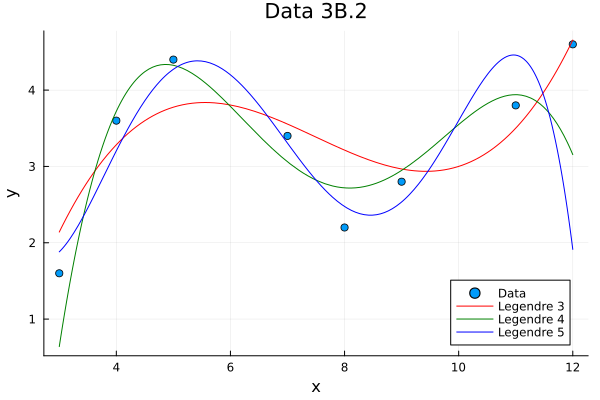

In [36]:
#define the points
xdomain = vec([3 4 5 7 8 9 11 12])
y = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])
a = minimum(xdomain)
b = maximum(xdomain)

#transform xdomain to [-1, 1]
xdomain_transformed = change_of_variable.(xdomain, a, b)
points = [(xdomain_transformed[i], y[i]) for i in 1:length(xdomain_transformed)]

degree1        = 3
fn_legendre_t1 = legendre_discrete(points, degree1)
fn_legendre_x1 = (x) -> fn_legendre_t1(change_of_variable.(x, a, b))

degree2        = 4
fn_legendre_t2 = legendre_discrete(points, degree2)
fn_legendre_x2 = (x) -> fn_legendre_t2(change_of_variable.(x, a, b))

degree3        = 5
fn_legendre_t3 = legendre_discrete(points, degree3)
fn_legendre_x3 = (x) -> fn_legendre_t3(change_of_variable.(x, a, b))

scatter(xdomain, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B.2")
plot!(fn_legendre_x1, a, b, label = "Legendre $degree1", title = "Data 3B.2", color = :red)
plot!(fn_legendre_x2, a, b, label = "Legendre $degree2", title = "Data 3B.2", color = :green)
plot!(fn_legendre_x3, a, b, label = "Legendre $degree3", title = "Data 3B.2", color = :blue)

## 3B.3

In [37]:
xdomain = vec([3 4 5 7 8 9 11 12])
yrange  = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])

lengrendre_pred = fn_legendre_x.(xdomain)
fn_degree3_pred = fn_degree3.(xdomain)
fn_degree4_pred = fn_degree4.(xdomain)
fn_degree5_pred = fn_degree5.(xdomain)
fn_legendre_degree3_pred = fn_legendre_x1.(xdomain)
fn_legendre_degree4_pred = fn_legendre_x2.(xdomain)
fn_legendre_degree5_pred = fn_legendre_x3.(xdomain)

#dataframe with the predicted values
df = DataFrame(xdomain = xdomain,
               lengrendre_pred = lengrendre_pred,
               fn_degree3_pred = fn_degree3_pred,
               fn_degree4_pred = fn_degree4_pred,
               fn_degree5_pred = fn_degree5_pred,
               fn_legendre_degree3_pred = fn_legendre_degree3_pred,
               fn_legendre_degree4_pred = fn_legendre_degree4_pred,
               fn_legendre_degree5_pred = fn_legendre_degree5_pred,
               original_y = yrange)

df

Row,xdomain,lengrendre_pred,fn_degree3_pred,fn_degree4_pred,fn_degree5_pred,fn_legendre_degree3_pred,fn_legendre_degree4_pred,fn_legendre_degree5_pred,original_y
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,3,1.91676,1.83213,1.53518,1.57366,2.14034,0.639337,1.88112,1.6
2,4,3.48733,3.41452,3.7885,3.69046,3.28385,3.72287,3.20485,3.6
3,5,4.58727,4.03471,4.27819,4.32425,3.77662,4.32545,4.27341,4.4
4,7,3.20162,3.50875,3.1575,3.24401,3.5552,3.06082,3.30479,3.4
5,8,2.52239,2.92271,2.64917,2.61803,3.21366,2.71927,2.4753,2.2
6,9,2.6577,2.4947,2.58128,2.48596,2.96664,2.94811,2.53418,2.8
7,11,3.88258,3.23302,3.80011,3.89359,3.50147,3.94049,4.45852,3.8
8,12,4.61499,4.95946,4.61008,4.57004,4.65596,3.15496,1.91317,4.6


## 3B.4

In [38]:
#calculate the standard error for each function
std_error_fn_degree3  = standard_stimation_error(fn_degree3,    points, 3)
std_error_fn_degree4  = standard_stimation_error(fn_degree4,    points, 4)
std_error_fn_degree5  = standard_stimation_error(fn_degree5,    points, 5)
std_error_fn_legendre_degree3 = standard_stimation_error(fn_legendre_x1, points, 3)
std_error_fn_legendre_degree4 = standard_stimation_error(fn_legendre_x2, points, 4)
std_error_fn_legendre_degree5 = standard_stimation_error(fn_legendre_x3, points, 5)


#calculate the correlation coefficient for each function
correlation_fn_degree3  = correlation_coefficient(fn_degree3,    points)
correlation_fn_degree4  = correlation_coefficient(fn_degree4,    points)
correlation_fn_degree5  = correlation_coefficient(fn_degree5,    points)
correlation_fn_legendre_degree3 = correlation_coefficient(fn_legendre_x1, points)
correlation_fn_legendre_degree4 = correlation_coefficient(fn_legendre_x2, points)
correlation_fn_legendre_degree5 = correlation_coefficient(fn_legendre_x3, points)

std_error_vec = vec([std_error_fn_legendre_degree3, std_error_fn_degree3,
                     std_error_fn_legendre_degree4, std_error_fn_degree4,
                     std_error_fn_legendre_degree5, std_error_fn_degree5,
                ])

correlation_vec = vec([correlation_fn_legendre_degree3, correlation_fn_degree3,
                       correlation_fn_legendre_degree4, correlation_fn_degree4,
                       correlation_fn_legendre_degree5, correlation_fn_degree5,
                ])

#dataframe with the standard error and correlation coefficient for each function
df = DataFrame(standard_error = std_error_vec,
               correlation_coefficient = correlation_vec,
               functions = ["Legendre 3", "Degree 3", "Legendre 4", "Degree 4", "Legendre 5", "Degree 5"])

Row,standard_error,correlation_coefficient,functions
,Float64,Float64,String
1,12.9737,11.4839,Legendre 3
2,18.6136,16.5084,Degree 3
3,66.852,54.2149,Legendre 4
4,43.996,35.6715,Degree 4
5,69.161,50.1647,Legendre 5
6,28.7101,20.8044,Degree 5


# 3C

![Alt text](./images/3c.png)

## 3C.1

Para poder aplicar legendre es necesario que los datos esten en el intervalo [-1,1], por lo tanto se debe hacer un cambio de variable para que los datos esten en ese intervalo.

El cambio de variable es el siguiente:

$$
\begin{align*}
    x &= \frac{(b-a) \times (t+1)}{2} + a \\
    t &= 2\frac{(x-a)}{b-a} - 1
\end{align*}
$$

In [39]:
# x = ((b - a)*(t + 1)/2) + a
# t = -1 + (2*(x - a)/(b - a))
function change_of_variable(x, a::Float64, b::Float64)::Float64
    return -1 + (2*(x - a)/(b - a))
end
function change_of_variable_inv(t, a::Float64, b::Float64)::Float64
    return a + ((b - a)*(t + 1)/2)
end

change_of_variable_inv (generic function with 2 methods)

In [40]:
function fx1(x)
    return exp(x)
end
function ft1(t)
    return exp( (((b-a)*(t + 1)/2) + a) )
end

ft1 (generic function with 1 method)

Number of polynomials: 5
Coefficients: 5


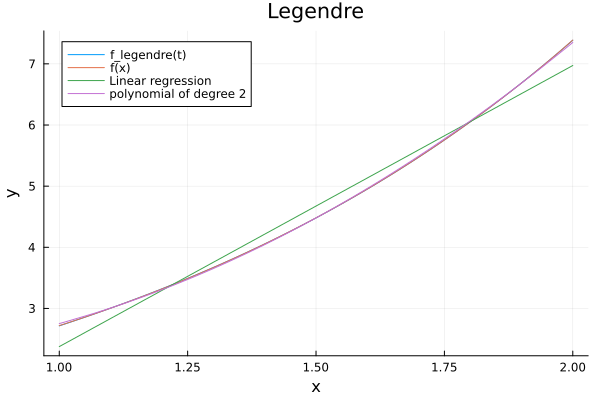

In [41]:
@variables x
a = 1.0
b = 2.0
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

# build the domains for the functions, the original and the transformed
xdom = range(start = a, stop = b, length = 100)
tdom = change_of_variable.(xdom, a, b)

# apply legendre over the transformed function
f1 = legendre(ft1, a_, b_ , 3)
yprima = f1.(tdom)

#sample some points from the function
points = vec([(xdom[i], fx1(xdom[i])) for i in 1:length(xdom)])

# apply linear regression over the points of the function
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

# apply polynomial regression over the points of the function
degree = 3
coefs = polynomial_regression(points, degree)
quad_fn = build_poly_fn(coefs)

plot(xdom,  yprima,     label = "f_legendre(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(xdom, fx1.(xdom), label = "f(x)",          xlabel = "x", ylabel = "y", title = "Legendre")

plot!(lin_fn,  a, b, label = "Linear regression")
plot!(quad_fn, a, b, label = "polynomial of degree $(degree-1)")

## 3C.2

In [42]:
function fx2(x)
    return 1/x
end

function ft2(t)
    return 1/(((b-a)*(t + 1)/2) + a) 
end

ft2 (generic function with 1 method)

Number of polynomials: 5
Coefficients: 5

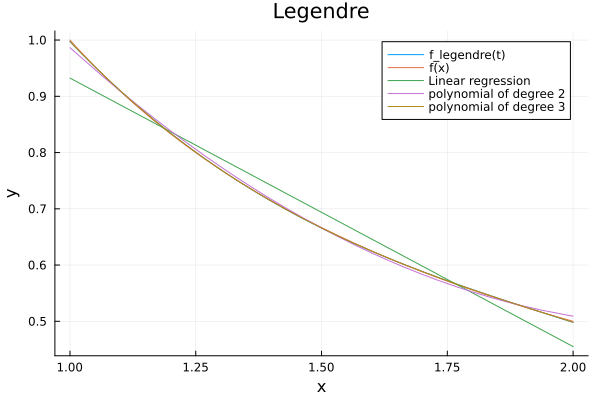

In [43]:
@variables x
a = 1.0
b = 2.0
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

# build the domains for the functions, the original and the transformed
xdom = range(start = a, stop = b, length = 100)
tdom = change_of_variable.(xdom, a, b)

# apply legendre over the transformed function
f2 = legendre(ft2, a_, b_ , 3)
yprima = f2.(tdom)

#sample some points from the function
points = vec([(xdom[i], fx2(xdom[i])) for i in 1:length(xdom)])

# apply linear regression over the points of the function
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

# apply polynomial regression over the points of the function
degree1 = 3
coefs   = polynomial_regression(points, degree1)
quad_fn = build_poly_fn(coefs)

degree2  = 4
coefs    = polynomial_regression(points, degree2)
cubic_fn = build_poly_fn(coefs)

plot(xdom,  yprima,     label = "f_legendre(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(xdom, fx2.(xdom), label = "f(x)",          xlabel = "x", ylabel = "y", title = "Legendre")

plot!(lin_fn,   a, b, label = "Linear regression")
plot!(quad_fn,  a, b, label = "polynomial of degree $(degree1-1)")
plot!(cubic_fn, a, b, label = "polynomial of degree $(degree2-1)")

## 3C.3

In [44]:
function fx3(x)
    return (2*x)^3
end
function ft3(t)
    return (2*(((b-a)*(t + 1)/2) + a))^3
end

ft3 (generic function with 1 method)

Number of polynomials: 5
Coefficients: 5


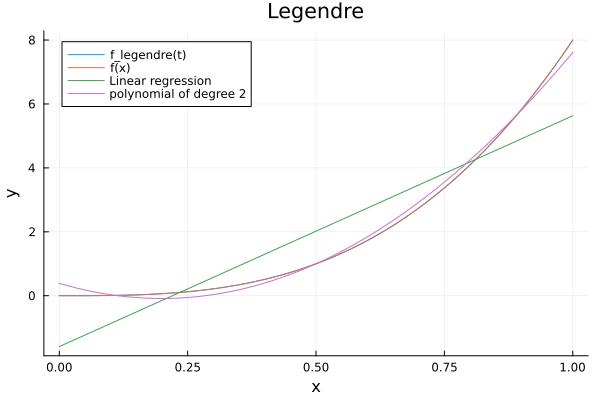

In [45]:
@variables x
a = 0.0
b = 1.0
a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

# build the domains for the functions, the original and the transformed
xdom = range(start = a, stop = b, length = 100)
tdom = change_of_variable.(xdom, a, b)

# apply legendre over the transformed function
f3 = legendre(ft3, a_, b_ , 3)
yprima = f3.(tdom)

#sample some points from the function
points = vec([(xdom[i], fx3(xdom[i])) for i in 1:length(xdom)])

# apply linear regression over the points of the function
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

# apply polynomial regression over the points of the function
degree = 3
coefs = polynomial_regression(points, degree)
quad_fn = build_poly_fn(coefs)

plot(xdom,  yprima,     label = "f_legendre(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(xdom, fx3.(xdom), label = "f(x)",          xlabel = "x", ylabel = "y", title = "Legendre")

plot!(lin_fn,  a, b, label = "Linear regression")
plot!(quad_fn, a, b, label = "polynomial of degree $(degree-1)")

# 3D.1

![Alt text](./images/3d1.png)

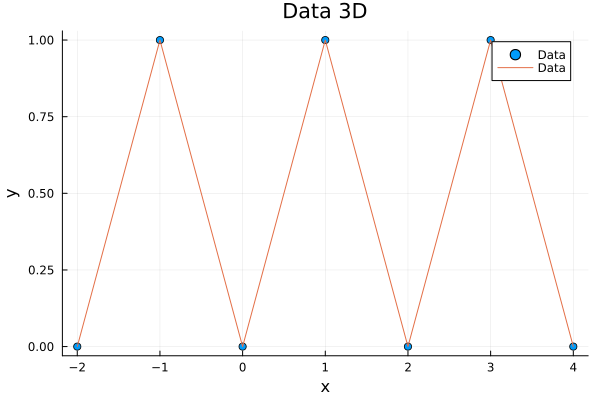

In [46]:
xdomain = vec(range(start = -2, stop = 4, step = 1))
yrange  = vec([0 1 0 1 0 1 0]) 
points = [(xdomain[i], yrange[i]) for i in 1:length(xdomain)]

scatter(xdomain, yrange, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3D")
plot!(xdomain,   yrange, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3D")

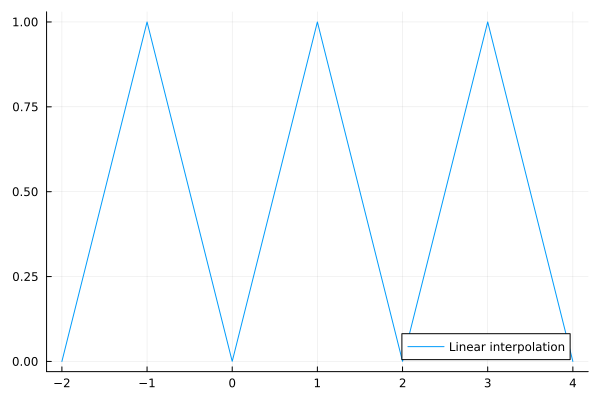

In [47]:
# Linear interpolation function
function linear_interpolation(x, x0, y0, x1, y1)
    return y0 + (x - x0) * (y1 - y0) / (x1 - x0)
end

# Function to generate a linear interpolation function for a list of points
function linear_interpolator(points)
    function interpolated_function(x)
        for i in 1:length(points)-1
            x0, y0 = points[i]
            x1, y1 = points[i+1]

            if x >= x0 && x <= x1
                return linear_interpolation(x, x0, y0, x1, y1)
            end
        end

        error("Error: x value outside the range of points.")
    end

    return interpolated_function
end

# Create the linear interpolation function
interpolated_function = linear_interpolator(points)

plot(interpolated_function, -2, 4, label = "Linear interpolation")

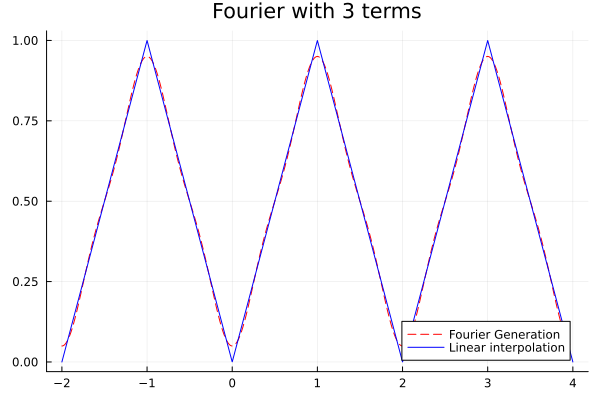

In [48]:
T   = 2.0
n   = 3
tol = 0.01

fourier_fn = fourier(interpolated_function, T, n, tol)
plot(fourier_fn,             -2, 4, label = "Fourier Generation", color = :red, linestyle = :dash, title = "Fourier with $n terms")
plot!(interpolated_function, -2, 4, label = "Linear interpolation", color = :blue)

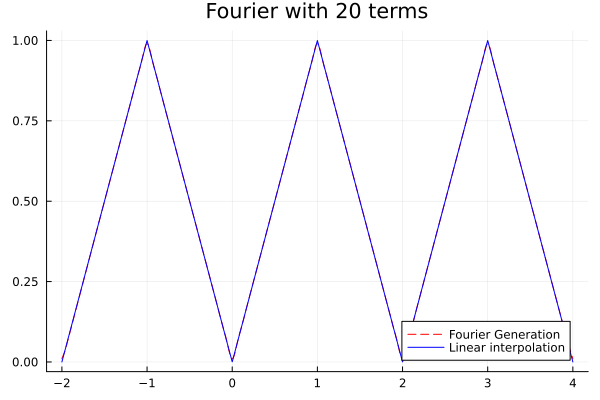

In [49]:
T   = 2.0
n   = 20
tol = 0.01

fourier_fn = fourier(interpolated_function, T, n, tol)
plot(fourier_fn,             -2, 4, label = "Fourier Generation", color = :red, linestyle = :dash, title = "Fourier with $n terms")
plot!(interpolated_function, -2, 4, label = "Linear interpolation", color = :blue)


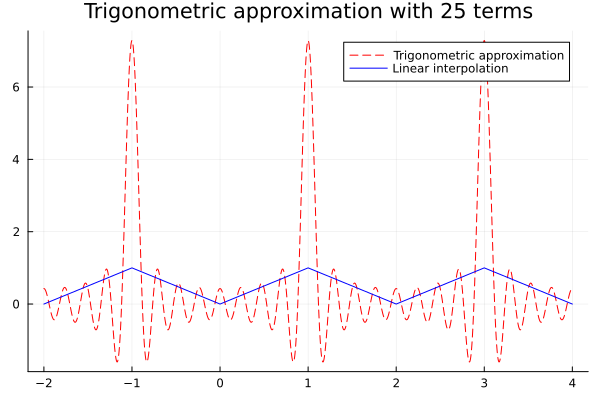

In [50]:
# Original data
xdomain = vec(range(start = -2, stop = 4, step = 1))
yrange  = vec([0 1 0 1 0 1 0]) 
points = [(xdomain[i], yrange[i]) for i in 1:length(xdomain)]
period = 6.0

# Create the trigonometric approximation function
nterms = 25
fn_trig_approx_t = discrete_trigonometric_approx(points, nterms, period)
fn_trig_approx_x = (x) -> fn_trig_approx_t(x)

# Compare the trigonometric approximation with the linear interpolation
plot(fn_trig_approx_x, -2, 4, label = "Trigonometric approximation", color = :red, linestyle = :dash, title = "Trigonometric approximation with $nterms terms")
plot!(interpolated_function, -2, 4, label = "Linear interpolation", color = :blue)

# 3D.2

![Alt text](./images/3d2.png)

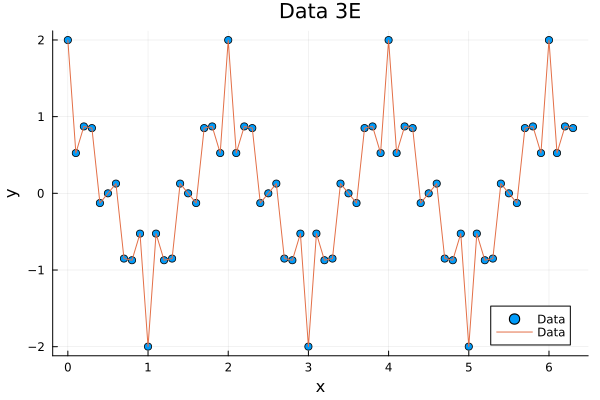

In [51]:
xdom = vec(0:0.1:6.3)
ydom = vec([1.9990 0.5253 0.8726 0.8509 -0.1269 0.0000 0.1269 -0.8509 -0.8726 -0.5253 -1.9990 -0.5253 -0.8726 -0.8509 0.1269 0.0000 -0.1269 0.8509 0.8726 0.5253 1.9990 0.5253 0.8726 0.8509 -0.1269 0.0000 0.1269 -0.8509 -0.8726 -0.5253 -1.9990 -0.5253 -0.8726 -0.8509 0.1269 0.0000 -0.1269 0.8509 0.8726 0.5253 1.9990 0.5253 0.8725 0.8509 -0.1269 0.0000 0.1269 -0.8509 -0.8726 -0.5253 -1.9990 -0.5253 -0.8726 -0.8509 0.1269 0 -0.1269 0.8509 0.8726 0.5253 1.9990 0.5253 0.8726 0.8509])

points = [(xdom[i], ydom[i]) for i in 1:length(xdom)]
start = xdom[1]
end_ = xdom[end]

scatter(xdom, ydom, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3E")
plot!(xdom, ydom, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3E")

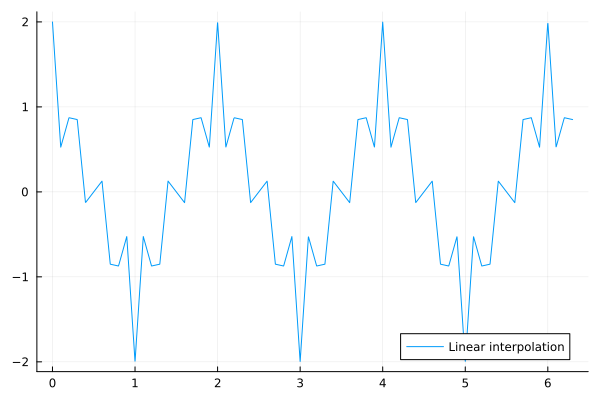

In [52]:
# Create the linear interpolation function
interpolated_function2 = linear_interpolator(points)

plot(interpolated_function2, start, end_, label = "Linear interpolation")

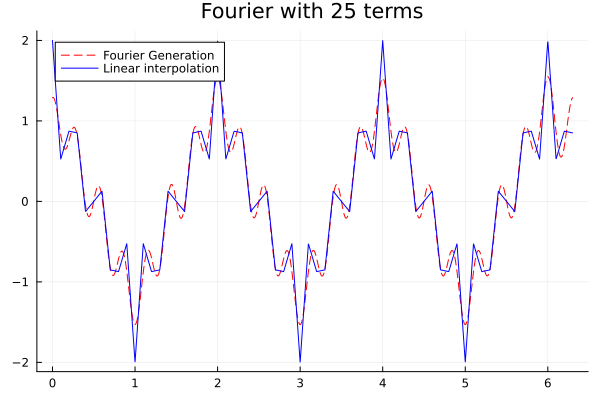

In [53]:
T   = 6.3
n   = 25
tol = 0.001
lower_bound = 0.0
upper_bound = 6.3

fourier_fn = fourier(interpolated_function2, T, n, tol, lower_lim=lower_bound, upper_lim=upper_bound)
plot(fourier_fn,              lower_bound, upper_bound, label = "Fourier Generation", color = :red, linestyle = :dash, title = "Fourier with $n terms")
plot!(interpolated_function2, lower_bound, upper_bound, label = "Linear interpolation", color = :blue)

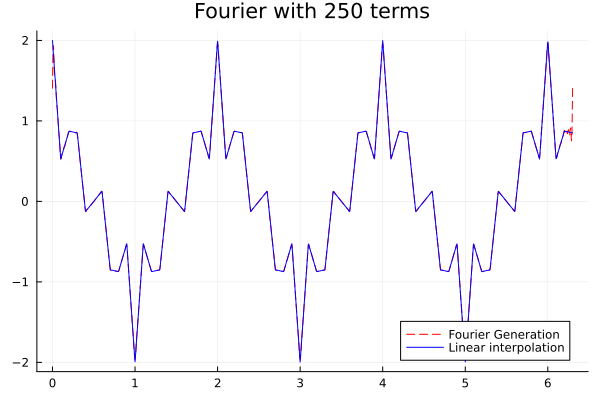

In [54]:
T   = 6.3
n   = 250
tol = 0.001
lower_bound = 0.0
upper_bound = 6.3

fourier_fn = fourier(interpolated_function2, T, n, tol, lower_lim=lower_bound, upper_lim=upper_bound)
fourier_fn = fourier(interpolated_function2, T, n, tol, lower_lim=lower_bound, upper_lim=upper_bound)
plot(fourier_fn,              lower_bound, upper_bound, label = "Fourier Generation", color = :red, linestyle = :dash, title = "Fourier with $n terms")
plot!(interpolated_function2, lower_bound, upper_bound, label = "Linear interpolation", color = :blue)

In [55]:
# x = ((b - a)*(t + 1)/2) + a
# t = -1 + (2*(x - a)/(b - a))
function change_of_variable2(x, a, b)::Float64
    return (-1 + (2*(x - a)/(b - a)))*π
end
function change_of_variable_inv2(t, a, b)::Float64
    return (a + ((b - a)*(t + 1)/2))/π
end

change_of_variable_inv2 (generic function with 1 method)

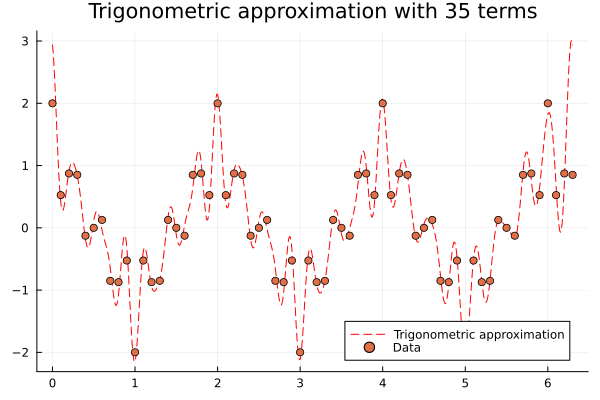

In [56]:
#datos originales 
xdom = vec(0:0.1:6.3)
ydom = vec([1.9990 0.5253 0.8726 0.8509 -0.1269 0.0000 0.1269 -0.8509 -0.8726 -0.5253 -1.9990 -0.5253 -0.8726 -0.8509 0.1269 0.0000 -0.1269 0.8509 0.8726 0.5253 1.9990 0.5253 0.8726 0.8509 -0.1269 0.0000 0.1269 -0.8509 -0.8726 -0.5253 -1.9990 -0.5253 -0.8726 -0.8509 0.1269 0.0000 -0.1269 0.8509 0.8726 0.5253 1.9990 0.5253 0.8725 0.8509 -0.1269 0.0000 0.1269 -0.8509 -0.8726 -0.5253 -1.9990 -0.5253 -0.8726 -0.8509 0.1269 0 -0.1269 0.8509 0.8726 0.5253 1.9990 0.5253 0.8726 0.8509])
xtrans = change_of_variable2.(xdom, 0.0, 6.3)

points = [(xtrans[i], ydom[i]) for i in 1:length(xdom)]
period = 2π

# Create the trigonometric approximation function
nterms = 35
fn_trig_approx_t = discrete_trigonometric_approx(points, nterms, period)
fn_trig_approx_x = (x) -> fn_trig_approx_t(change_of_variable2.(x, 0.0, 6.3))

# Compare the trigonometric approximation with the linear interpolation
plot(fn_trig_approx_x, start, end_, label = "Trigonometric approximation", color = :red, linestyle = :dash, title = "Trigonometric approximation with $nterms terms")
#plot!(interpolated_function2, start, end_, label = "Linear interpolation", color = :blue)
scatter!(xdom, ydom, label = "Data")

In [57]:
print("length of points: ", length(points))

length of points: 64